In [62]:
#사용 기상청 데이터 : 1974-2023년까지의 서울 종관관측데이터
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [44]:
folder_path = 'data'
file_list = os.listdir(folder_path)
csv_files = [file for file in file_list if file.endswith('.csv')]

In [45]:
# CSV 파일들을 읽어서 DataFrame으로 병합
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, encoding = 'euckr')
    df_list.append(df)
    
# DataFrame 병합
merged_df = pd.concat(df_list, ignore_index=True)


In [46]:
merged_df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위)
0,108,서울,2014-01-01,4.0,0.3,723.0,7.9,1535.0,0.03,NaN,...,0.0,14.8,270.0,1304.0,7.8,270.0,1256.0,3.7,3218.0,270.0
1,108,서울,2014-01-02,1.5,-1.3,724.0,6.2,1507.0,NaN,NaN,...,NaN,6.0,270.0,1327.0,4.0,230.0,1124.0,2.0,1685.0,290.0
2,108,서울,2014-01-03,2.3,-1.1,635.0,7.3,1338.0,NaN,NaN,...,NaN,7.8,320.0,2053.0,5.4,320.0,2136.0,2.5,2148.0,50.0
3,108,서울,2014-01-04,-0.1,-3.7,722.0,5.6,1344.0,NaN,NaN,...,NaN,7.6,270.0,1748.0,4.7,290.0,1749.0,2.4,2087.0,270.0
4,108,서울,2014-01-05,-0.8,-4.3,810.0,3.8,1418.0,NaN,NaN,...,NaN,6.9,250.0,1521.0,4.4,290.0,1543.0,1.9,1660.0,270.0


In [47]:
merged_df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)'],
      dtype='object')

In [48]:
#날짜순으로 데이터 정렬
merged_df_sorted = merged_df.sort_values(by = '일시')
merged_df_sorted

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위)
14610,108,서울,1974-01-01,1.0,-4.3,410.0,7.6,1423.0,1.42,NaN,...,0.0,7.0,230.0,1504.0,5.0,230.0,1540.0,2.1,1824.0,70.0
14611,108,서울,1974-01-02,3.0,-1.1,550.0,9.3,1352.0,NaN,NaN,...,NaN,4.7,250.0,1437.0,3.3,250.0,1600.0,1.6,1394.0,50.0
14612,108,서울,1974-01-03,3.0,-0.9,755.0,8.7,1520.0,NaN,NaN,...,NaN,5.5,70.0,945.0,3.0,70.0,1100.0,1.3,1127.0,70.0
14613,108,서울,1974-01-04,1.3,-1.6,600.0,5.6,1505.0,NaN,NaN,...,NaN,6.0,290.0,1552.0,4.0,290.0,1650.0,1.9,1646.0,290.0
14614,108,서울,1974-01-05,-1.1,-3.7,740.0,2.1,1542.0,NaN,NaN,...,NaN,3.8,70.0,907.0,3.0,320.0,50.0,1.0,839.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,108,서울,2023-12-27,1.5,-2.8,813.0,6.8,1549.0,NaN,NaN,...,NaN,4.7,110.0,1235.0,3.0,50.0,1237.0,1.4,1203.0,50.0
3648,108,서울,2023-12-28,1.2,-1.7,620.0,4.4,1453.0,NaN,NaN,...,NaN,8.0,290.0,1456.0,4.7,290.0,1350.0,1.6,1342.0,270.0
3649,108,서울,2023-12-29,1.3,-1.5,725.0,4.6,1438.0,NaN,NaN,...,NaN,5.7,250.0,1448.0,3.3,270.0,1455.0,1.7,1481.0,20.0
3650,108,서울,2023-12-30,0.6,-0.9,237.0,2.1,2354.0,16.67,NaN,...,13.1,6.9,50.0,2013.0,4.6,50.0,1739.0,2.6,2276.0,50.0


In [49]:
# 그래프 그리기
# 일시 컬럼을 Datetime 형식으로 변환
merged_df_sorted['일시'] = pd.to_datetime(merged_df_sorted['일시'])

In [50]:
#연도별, 월별 최고기온 추이 뽑아내기
df_max_temp = merged_df_sorted[['일시', '최고기온(°C)']]
df_max_temp.head()

,일시,최고기온(°C)
14610,1974-01-01,7.6
14611,1974-01-02,9.3
14612,1974-01-03,8.7
14613,1974-01-04,5.6
14614,1974-01-05,2.1


In [51]:
#연도, 월 컬럼 추가
df_max_temp['연도'] = df_max_temp['일시'].dt.year
df_max_temp['월'] = df_max_temp['일시'].dt.month
df_max_temp.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18092\2404312150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_temp['연도'] = df_max_temp['일시'].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_18092\2404312150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_temp['월'] = df_max_temp['일시'].dt.month


,일시,최고기온(°C),연도,월
14610,1974-01-01,7.6,1974,1
14611,1974-01-02,9.3,1974,1
14612,1974-01-03,8.7,1974,1
14613,1974-01-04,5.6,1974,1
14614,1974-01-05,2.1,1974,1


In [52]:
result = df_max_temp.groupby(['연도', '월'])['최고기온(°C)'].max()
result_df = result.reset_index()
result_df

,연도,월,최고기온(°C)
0,1974,1,9.3
1,1974,2,9.9
2,1974,3,19.5
3,1974,4,23.1
4,1974,5,29.3
...,...,...,...
595,2023,8,35.8
596,2023,9,32.8
597,2023,10,24.6
598,2023,11,25.9


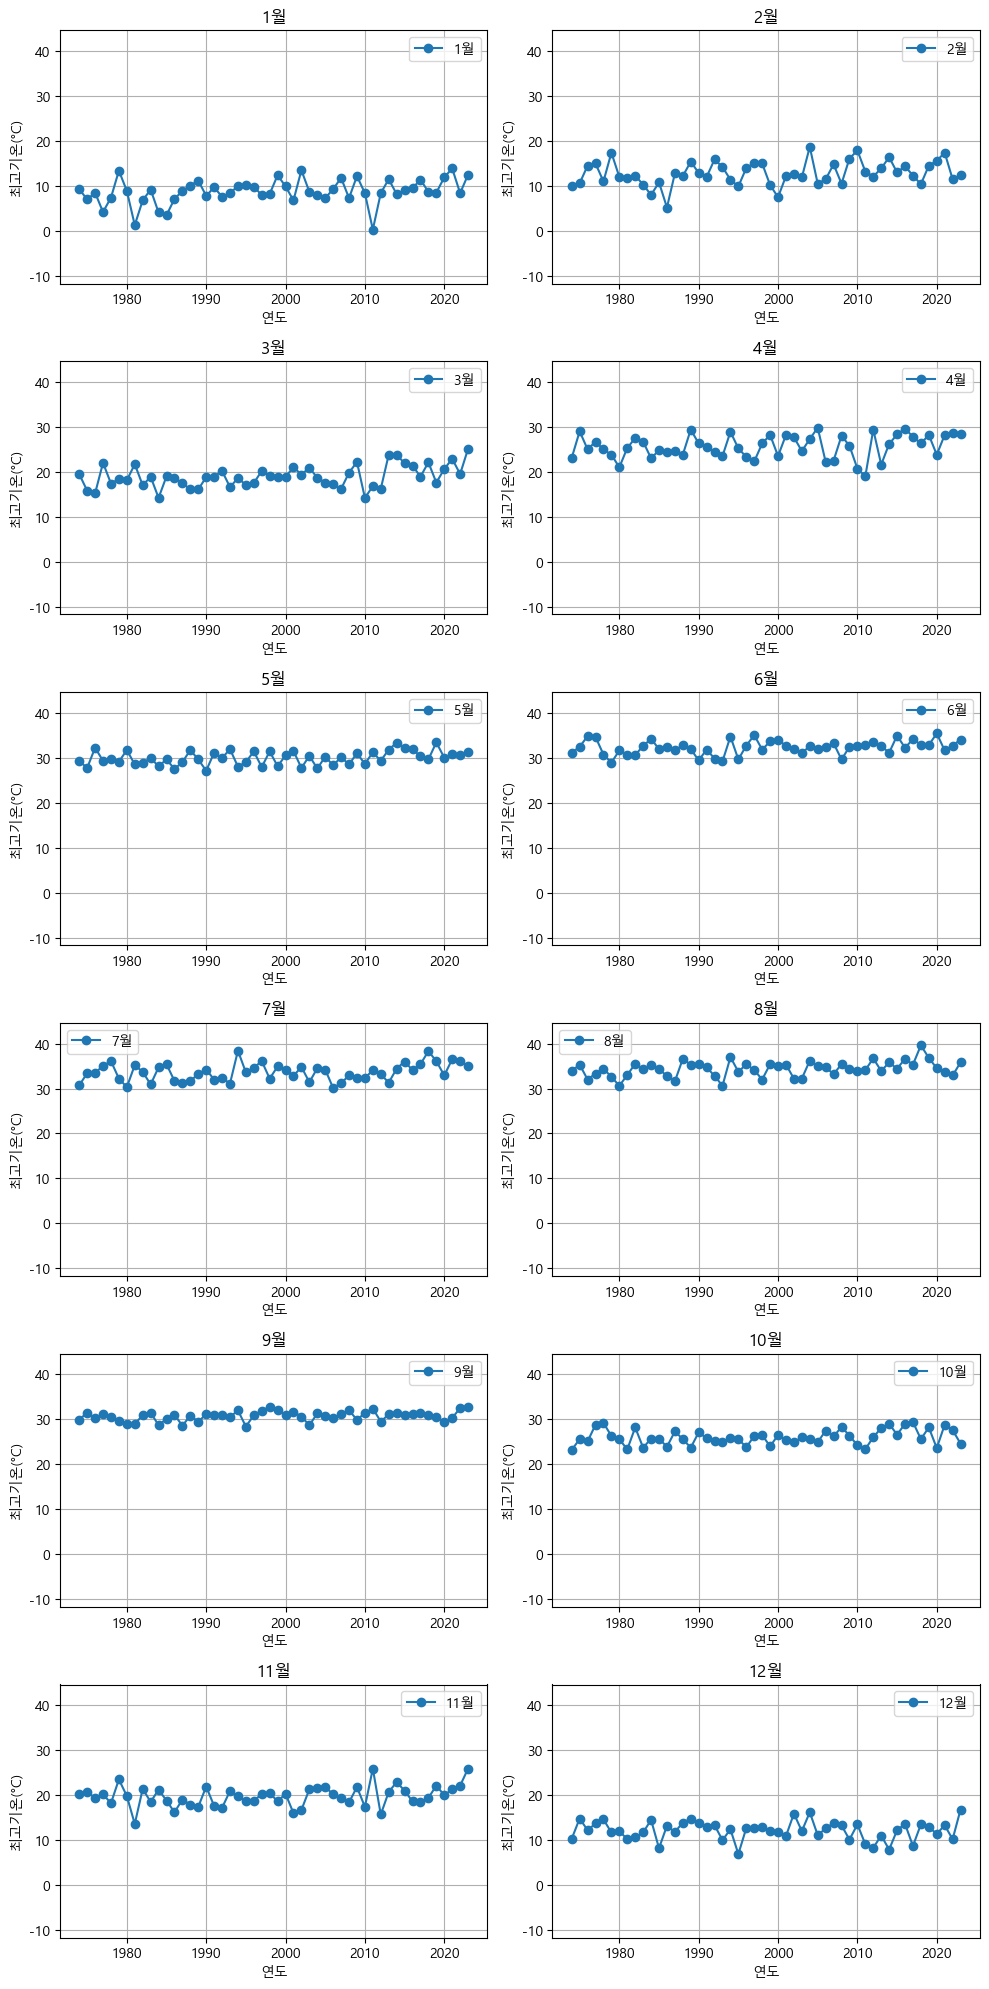

In [53]:
# subplot에 그릴 월별 평균기온 데이터 선택
months = list(range(1,13))

# subplot을 이용하여 그래프 그리기
fig, axs = plt.subplots(6,2, figsize=(10, 20))
y_max = 0
y_min = float('inf')
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    month_data = result_df[result_df['월'] == month]
    axs[row, col].plot(month_data['연도'], month_data['최고기온(°C)'], marker='o', linestyle='-', label=f'{month}월')
    axs[row, col].set_title(f'{month}월')
    axs[row, col].set_xlabel('연도')
    axs[row, col].set_ylabel('최고기온(°C)')
    axs[row, col].legend()
    axs[row, col].grid(True)
    
    # 각 서브플롯의 y축 범위 업데이트
    y_max = max(y_max, month_data['최고기온(°C)'].max())+1
    y_min = min(y_min, month_data['최고기온(°C)'].min())-1

# 모든 서브플롯의 y축 범위를 동일하게 설정
for ax in axs.flat:
    ax.set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()

In [54]:
#일 최고기온이 30도 이상인 월 조회

count_by_year_month = df_max_temp[df_max_temp['최고기온(°C)'] > 30].groupby(['연도', '월']).count()
count_by_year_month = count_by_year_month.reset_index()
count_by_year_month = count_by_year_month.rename(columns = {'최고기온(°C)' : '30도이상일수'})
count_by_year_month

,연도,월,일시,30도이상일수
0,1974,6,1,1
1,1974,7,4,4
2,1974,8,16,16
3,1975,6,5,5
4,1975,7,12,12
...,...,...,...,...
200,2023,5,1,1
201,2023,6,6,6
202,2023,7,17,17
203,2023,8,20,20


In [55]:
count_by_year_month['월'].min(), count_by_year_month['월'].max()

(5, 9)

In [56]:
# 빈 데이터프레임 생성
count_by_year_month_5 = pd.DataFrame(columns=['연도', '월', '일시', '30도이상일수'])
count_by_year_month_6 = pd.DataFrame(columns=['연도', '월', '일시', '30도이상일수'])
count_by_year_month_7 = pd.DataFrame(columns=['연도', '월', '일시', '30도이상일수'])
count_by_year_month_8 = pd.DataFrame(columns=['연도', '월', '일시', '30도이상일수'])
count_by_year_month_9 = pd.DataFrame(columns=['연도', '월', '일시', '30도이상일수'])

# 각 월별로 데이터프레임을 생성하여 변수에 할당하는 반복문입니다.
for month in range(5, 10):
    # 해당 월의 데이터 추출
    df_month = count_by_year_month[count_by_year_month['월'] == month].copy()

    # 기존 데이터에 있는 연도 데이터 가져오기
    existing_years = df_month['연도'].unique()

    # 1974부터 2023까지의 연도로 빈 행 생성
    for year in range(1974, 2024):
        if year not in existing_years:
            df_month = df_month.append({'연도': year, '월': month, '일시': pd.NaT, '30도이상일수': 0}, ignore_index=True)

    # 데이터프레임 정렬
    df_month.sort_values(by='연도', inplace=True)

    # 변수에 할당
    var_name = f"count_by_year_month_{month}"
    globals()[var_name] = df_month

C:\Users\user\AppData\Local\Temp\ipykernel_18092\3141955962.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month = df_month.append({'연도': year, '월': month, '일시': pd.NaT, '30도이상일수': 0}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18092\3141955962.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month = df_month.append({'연도': year, '월': month, '일시': pd.NaT, '30도이상일수': 0}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18092\3141955962.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month = df_month.append({'연도': year, '월': month, '일시': pd.NaT, '30도이상일수': 0}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18092\3141955962.py:19: FutureWarning: The frame.ap

In [57]:
count_by_year_month_5

,연도,월,일시,30도이상일수
23,1974,5,NaT,0
24,1975,5,NaN,0
0,1976,5,3,3
25,1977,5,NaN,0
26,1978,5,NaN,0
27,1979,5,NaN,0
1,1980,5,1,1
28,1981,5,NaN,0
29,1982,5,NaN,0
30,1983,5,NaN,0


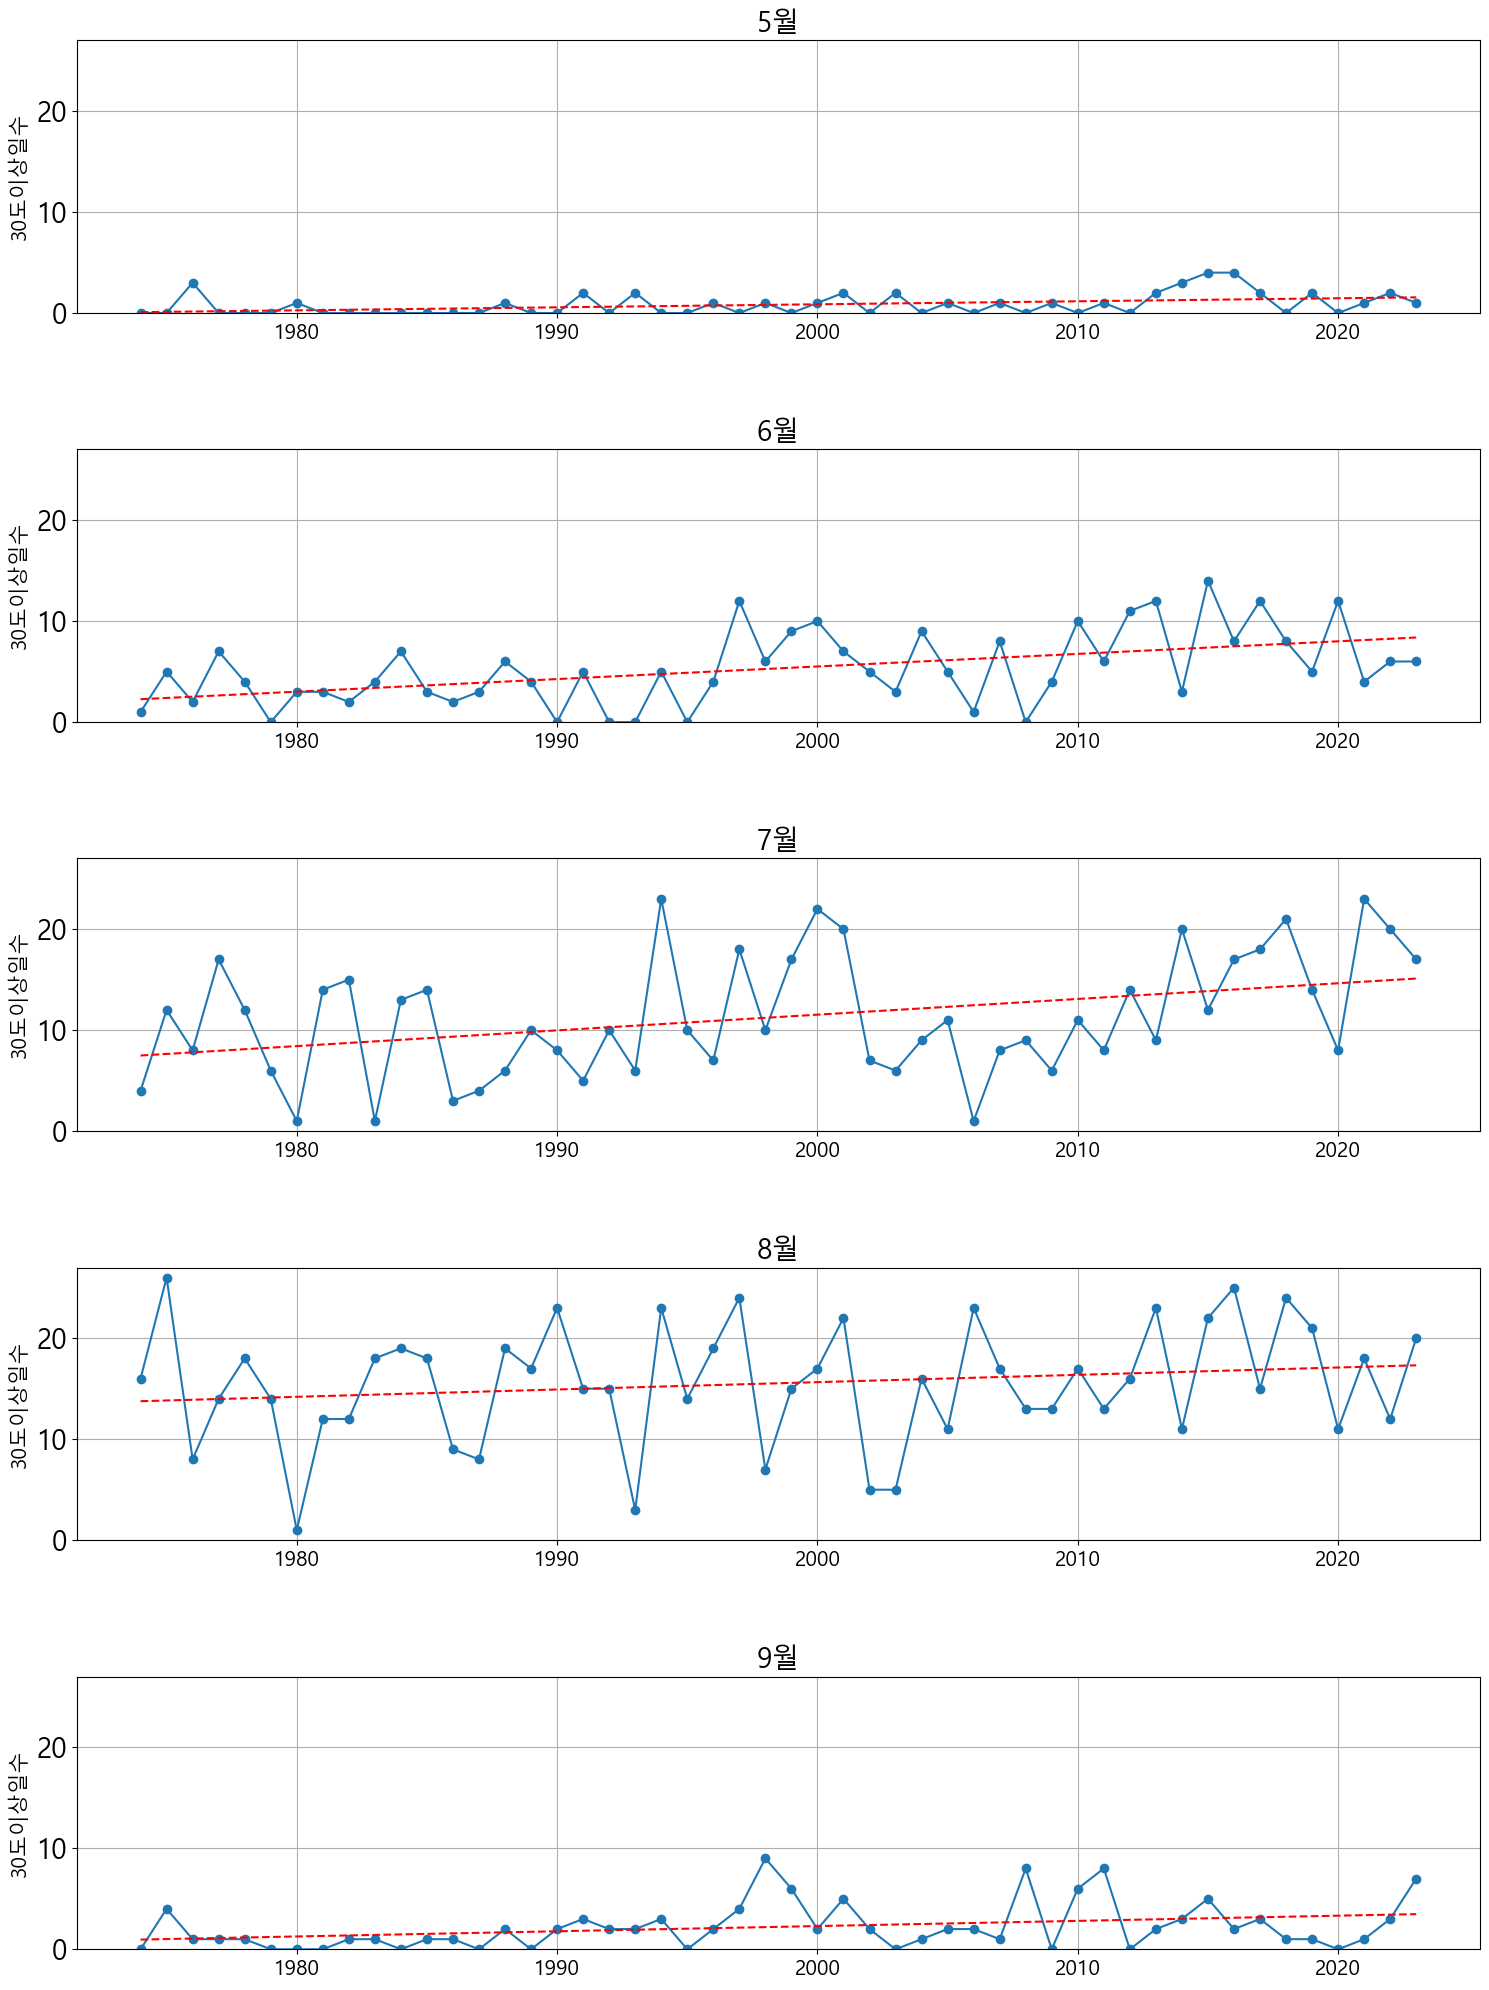

In [93]:
fig, axs = plt.subplots(len(range(5, 10)), 1, figsize=(15, 20))
n = 0
y_min = float('inf')  # 초기 최소값 설정
y_max = float('-inf')  # 초기 최대값 설정

for i in range(5, 10):
    var_name = f"count_by_year_month_{i}"
    var_value = globals()[var_name].copy()  # 원본 데이터를 유지하기 위해 복사합니다.

    all_years = list(range(1974, 2024))
    existing_years = var_value['연도'].unique()
    missing_years = set(all_years) - set(existing_years)

    if missing_years:
        for year in missing_years:
            var_value = var_value.append({'연도': year, '월': i, '일시': pd.NaT, '30도이상일수': 0}, ignore_index=True)

    # 연도 기준으로 데이터프레임 재정렬
    var_value = var_value.sort_values(by='연도').reset_index(drop=True)

    x = var_value['연도']
    y = var_value['30도이상일수']
    # 회귀 분석
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = intercept + slope * x

    axs[n].set_title(f'{i}월', fontsize = 20)
    axs[n].plot(x, y, marker='o', linestyle='-', label='실제 데이터')
    axs[n].plot(x, trendline, color='red', linestyle='--', label='추세선')
    axs[n].grid(True)
    axs[n].set_ylabel('30도이상일수', fontsize=15)
    axs[n].tick_params(axis='y', labelsize=20)
    axs[n].tick_params(axis='x', labelsize=15)

    # 각 서브플롯의 y축 범위를 업데이트
    y_min = min(y_min, y.min())
    y_max = max(y_max, y.max())

    n += 1

# 모든 서브플롯의 y축 범위를 동일하게 설정
for ax in axs:
    ax.set_ylim(y_min, y_max+1)

    
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('월별30도이상일수.png')
plt.show()


In [59]:
plt.show()

Text(0.5, 1.0, '연도별 30도이상일수')

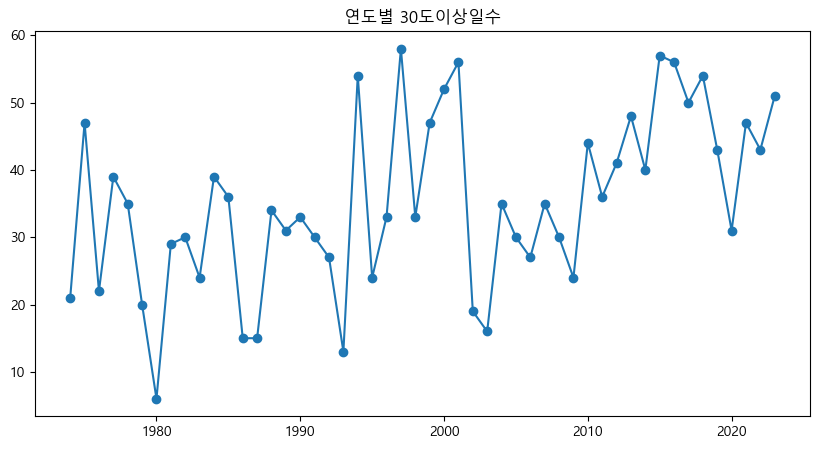

In [60]:
sum_by_year = count_by_year_month.groupby('연도').sum('30도이상일수').reset_index()

x = sum_by_year['연도']
y = sum_by_year['30도이상일수']


plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('연도별 30도이상일수')

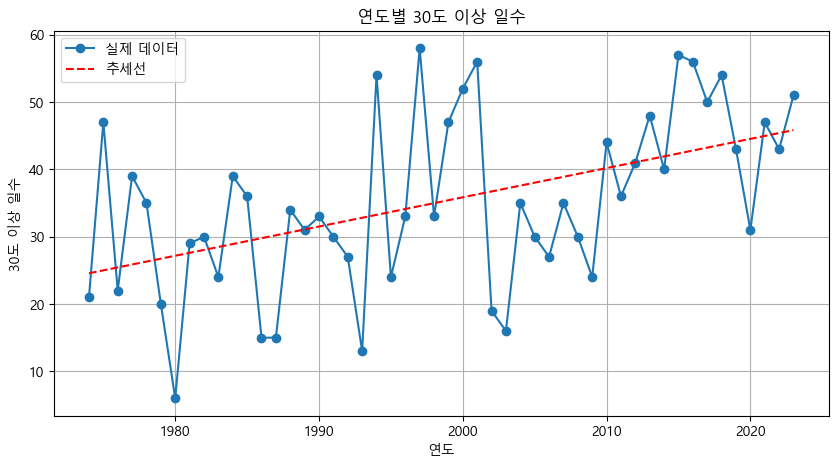

In [63]:
#추세선 추가
sum_by_year = count_by_year_month.groupby('연도').sum('30도이상일수').reset_index()

x = sum_by_year['연도']
y = sum_by_year['30도이상일수']

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', label='실제 데이터')

# 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x

plt.plot(x, trendline, color='red', linestyle='--', label='추세선')

plt.title('연도별 30도 이상 일수')
plt.xlabel('연도')
plt.ylabel('30도 이상 일수')
plt.legend()
plt.grid(True)
plt.show()
